# Training a neural network from scratch with Python.
Let us consider a supervised learning problem where X is a training example with n features. These features are usually known as inputs in neural network and form a first layer of the the network. y (a k dimensional vector) corresponds to label of each training example and belongs to any of k classes. y forms the final layer of the network. In vectorized notation X and y are represented by matrices of sizes m x n and m x k respectively, where m is the total number of examples (data points/ observations). <br>

In a fully connected neural network neurons of each layer share all of the neurons on the preceeding layer. In other words, outputs (usually called activations) of a layer become inputs to the next layer.  

### Getting a dataset
scikit-learn is a python library for machine learning. It has a datasets API which can used to generate data to play with. Let's use a make_moons function to generate 300 2-dimensional data points as shown in the following plot. As seen in the figure data has two types (classes) shown in 2 different colors.  


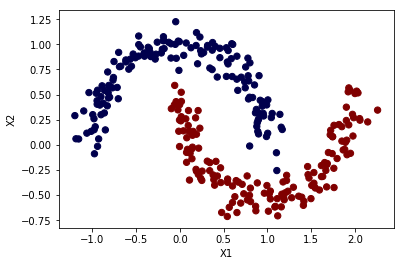

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import pandas as pd
np.random.seed(0)
X, y = datasets.make_moons(300, noise=0.10)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
y = pd.get_dummies(y).values

In [30]:
y.shape

(300, 2)

I am going to use two approaches using two different activation functions for the output layer. 

### Using sigmoid activation and mean squared error (loss function)
Steps: 
#### Forward propogation:<br>
$z^{2} = (W^{1})^{T}X + b^{1}$ <br>
$a^{2} = sigmod(z^{2})$    where $sigmoid(z)= \frac{1}{1+e^{-z}}$

$z^{3} = (W^{2})^{T}a^{2} + b^{2}$ <br>
$a^{3} = sigmod(z^{3})$ <br>

#### Cost Function: (m examples and k outputs)<br>
$J = \frac{1}{m} \sum_{i}^{m} \sum_{k} (a^{3}_{k}-y_{k})^{2} $

#### Back propagation:<br>
$\frac{\partial J}{\partial z^{3}} = \delta ^{3} = (a^{3}-y)\odot f'(z^{3})$    size [m, k]

$\delta ^{2} = (W^{2})^{T}\delta ^{3} \odot f'(z^{2}) $  ---------size [m,  n_hidden] <br>
$\odot $represents item wise product

$\frac{\partial J}{\partial W^{2}} = (a^{2})^{T} \delta^{3} $  matrix of size [n_hidden, k]<br>
$\frac{\partial J}{\partial b^{2}} = \sum^{m} \delta^{3} $ vector of size [1,k]<br> 
$\frac{\partial J}{\partial W^{1}} = X^{T} \delta^{2} $ matrix of size [n_input, n_hidden]<br>
$\frac{\partial J}{\partial b^{1}} = \sum^{m}\delta^{2} $ vector of size [1, n_hidden]<br>

#### Updates:<br>
$W^{l} = W^{l} - \alpha \frac{\partial J}{\partial W^{l}}$
$b^{l} = b^{l} - \alpha \frac{\partial J}{\partial b^{l}}$

In [31]:
# input layer
#n_input = 2  # number of features
#n_output = 2 # number of labels (classes)
def sigmoid(t):
    return 1./(1.+np.exp(-t))
    

def predict(model, X_):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X_.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = sigmoid(z3)
    return np.argmax(a3, axis=1)
    
def train(data, target, n_hidden, epoch, alpha_, reg):
    n_input = data.shape[1]
    n_output = target.shape[1]
    np.random.seed(0)
    W1 = np.random.randn(n_input,n_hidden) 
    b1 = np.random.randn(1,n_hidden)
    W2 = np.random.randn(n_hidden,n_output)
    b2 = np.random.randn(1,n_output)
    iterations = []
    error = []
    
    for i in range(epoch):
        alpha = alpha_*np.exp(-np.array(i)*0.0005) 
        #forward prop
        z2 = data.dot(W1)+b1
        a2 = sigmoid(z2)
        #print(a2.shape)
        z3 = a2.dot(W2)+b2
        a3 = sigmoid(z3)
        #print(a3.shape)
        
        
        #back prop 
        delta3 = (a3-target)*a3*(1-a3)   #(y'-y) f'(z)
        #print(delta3.shape)
        dW2 = (a2.T).dot(delta3)
        #print(dW2.shape)
        db2 = np.sum(delta3, axis=0).reshape((1,delta3.shape[1]))
        #print(db2.shape)
        delta2 = (delta3).dot(W2.T)*a2*(1.-a2)
        dW1 = (data.T).dot(delta2)
        db1 = np.sum(delta2, axis=0).reshape((1,delta2.shape[1]))
        #print(db1.shape)
        
        #regularization
        dW2 += reg*W2
        dW1 += reg*W1
        
        #Gradient descent, updating W and b
        W1-= alpha*dW1
        W2-= alpha*dW2
        b1-= alpha*db1
        b2-= alpha*db2
        #print(b2.shape)
        #print(b1.shape)
        parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if i% 100==0:
            iterations.append(i)
            loss = np.square(a3-target)
            loss = 0.5*np.sum(loss, axis=1)
            loss = np.average(loss)
            error.append(loss)
            #print('Steps: %d, Error: %g'%(i,loss))
    
    return parameters , iterations, error
        
        



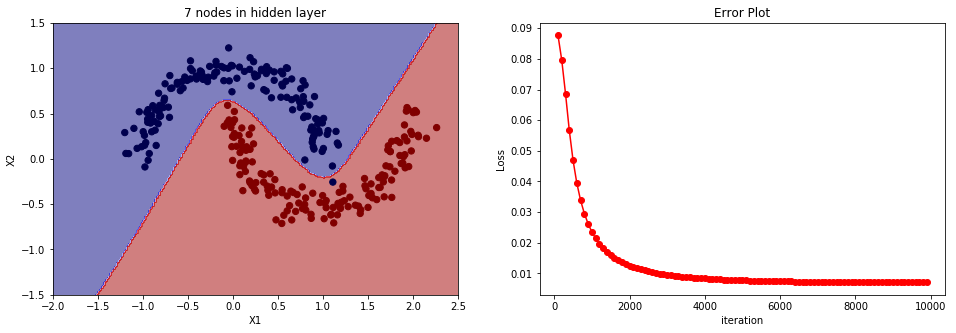

In [32]:
n_hidden = 7
epoch = 10000
alpha = 0.01
reg = 0.01
model, iterations, error = train(X, y, n_hidden, epoch, alpha, reg)


#plot
x1 = np.linspace(-2., 2.5, 200)
x2 = np.linspace(-1.5, 1.5, 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=np.argmax(y, axis=1), cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('%d nodes in hidden layer'%n_hidden)
plt.xlim(-2.,2.5)
plt.ylim(-1.5,1.5)


plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')
plt.show()

### Using sigmoid for the hidden layer and softmax for the final layer.
#### Softmax function:
If $y = [y_{i}], i=1,...,k$ i.e. k classes; softmax(y) is <br>
\begin{align}
softmax(y)= \frac{1}{\sum_{i} e^{y_{i}}} 
\begin{bmatrix} 
e^{y_{1}}\\
e^{y_{2}}\\
\vdots \\
e^{y_{k}}\\
\end{bmatrix}
\end{align}

#### Differentiation of Softmax function:
Consider $p = \frac{e^{y_{i}}}{\sum_{i}e^{y_{i}}}$ <br>

$\frac{\partial p}{\partial y_{i}} = \frac{1}{\sum_{i}e^{y_{i}}} \frac{\partial e^{y_{i}}}{\partial y_{i}} + e^{y_{i}}\frac{\partial}{\partial y_{i}} \frac{1}{\sum_{i}e^{y_{i}}} = \frac{e^{y_{i}}}{\sum_{i}e^{y_{i}}} -  e^{y_{i}}\frac{e^{y_{i}}}{(\sum_{i}e^{y_{i}})^{2}} = p(1-p)$


#### Forward propogation:<br>
$z^{2} = (W^{1})^{T}X + b^{1}$ <br>
$a^{2} = sigmod(z^{2})$    where $sigmoid(z)= \frac{1}{1+e^{-z}}$

$z^{3} = (W^{2})^{T}a^{2} + b^{2}$ <br>
$a^{3} = softmax(z^{3})$ <br>

#### Cost Function: (m examples and k outputs)<br>
$J = - \frac{1}{m} \sum_{m} \sum_{i} y_{i}.log(y^{'}_{i}) $ <br>
$y^{'}=a^{3}$ is the predicted output i.e. softmax($z^{3}$) in this case. <br>
$J = - \sum_{i} y_{i}.log \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} $  [$\sum_{m}$ is suppressed.]<br> 
$J = - \sum_{i}( y_{i}.z^{3}_{i} - y_{i}log\sum e^{z^{3}_{i}}) $ <br>
$J = - ( y_{i}.z^{3}_{i} - y_{i}log\sum_{i} e^{z^{3}_{i}} + \sum_{k \ne i} [y_{k}z^{3}_{k} -y_{k}log\sum_{i} e^{z^{3}_{i}}]) $ <br>

$\frac{\partial J}{\partial z^{3}_{i}} = -\begin{bmatrix}y_{i} - y_{i} \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} - \sum_{k \ne i} y_{k} \frac{e^{z^{3}_{i}}}{\sum_{i} e^{z^{3}_{i}}}\end{bmatrix} = -\begin{bmatrix}y_{i} - \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} \sum_{i} y_{i}\end{bmatrix} = (a^{3}_{i}-y_{i})$ since $\sum y = 1$

$\delta^{3} = (a^{3}_{i}-y_{i})$

#### Back propagation:<br>
$\frac{\partial J}{\partial z^{3}} = \delta ^{3} = (a^{3}-y)$    size [m, k]

$\delta ^{2} = (W^{2})^{T}\delta ^{3} \odot f'(z^{2}) $  ---------size [m,  n_hidden] <br>
$\odot $represents item wise product

$\frac{\partial J}{\partial W^{2}} = (a^{2})^{T} \delta^{3} $  matrix of size [n_hidden, k]<br>
$\frac{\partial J}{\partial b^{2}} = \sum^{m} \delta^{3} $ vector of size [1,k]<br> 
$\frac{\partial J}{\partial W^{1}} = X^{T} \delta^{2} $ matrix of size [n_input, n_hidden]<br>
$\frac{\partial J}{\partial b^{1}} = \sum^{m}\delta^{2} $ vector of size [1, n_hidden]<br>

#### Updates:<br>
$W^{l} = W^{l} - \alpha \frac{\partial J}{\partial W^{l}}$
$b^{l} = b^{l} - \alpha \frac{\partial J}{\partial b^{l}}$


#### Codes

In [33]:
# input layer
def sigmoid(t):
    return 1./(1.+np.exp(-t))

def softmax(t):
    t = np.exp(t)
    return t/(np.sum(t, axis=1).reshape((len(t),1)))
    

def predict_softmax(model, X_):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X_.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = softmax(z3)
    return np.argmax(a3, axis=1)
    
def train_softmax(data, target, n_hidden, epoch, alpha_, reg, decay=True):
    n_input = data.shape[1]
    n_output = target.shape[1]
    np.random.seed(0)
    W1 = np.random.randn(n_input,n_hidden) 
    b1 = np.random.randn(1,n_hidden)
    W2 = np.random.randn(n_hidden,n_output)
    b2 = np.random.randn(1,n_output)
    iterations = []
    error = []
    
    for i in range(epoch):
        if decay:
            alpha = alpha_*np.exp(-np.array(i)*0.000005)
        else:
            alpha = alpha_
        #forward prop
        z2 = data.dot(W1)+b1
        a2 = sigmoid(z2)
        #print(a2.shape)
        z3 = a2.dot(W2)+b2
        a3 = softmax(z3)
        #print(a3.shape)
        
        
        #back prop 
        delta3 = (a3-target)   #(y'-y) 
        #print(delta3.shape)
        dW2 = (a2.T).dot(delta3)
        #print(dW2.shape)
        db2 = np.sum(delta3, axis=0).reshape((1,delta3.shape[1]))
        #print(db2.shape)
        delta2 = (delta3).dot(W2.T)*a2*(1.-a2)
        dW1 = (data.T).dot(delta2)
        db1 = np.sum(delta2, axis=0).reshape((1,delta2.shape[1]))
        #print(db1.shape)
        
        #regularization
        dW2 += reg*W2
        dW1 += reg*W1
        
        #Gradient descent, updating W and b
        W1-= alpha*dW1
        W2-= alpha*dW2
        b1-= alpha*db1
        b2-= alpha*db2
        #print(b2.shape)
        #print(b1.shape)
        parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if i% 1000==0:
            iterations.append(i)
            #j = cost_softmax(parameters,data,target)
            loss = -1.*target*np.log(a3)
            loss = np.sum(loss, axis=1)
            loss = np.average(loss)
            error.append(loss)
            print('Steps: %d, Error: %g'%(i,loss))
    
    return parameters , iterations, error
        
        



Steps: 0, Error: 1.84611
Steps: 1000, Error: 0.125416
Steps: 2000, Error: 0.0570957
Steps: 3000, Error: 0.0354013
Steps: 4000, Error: 0.0252689
Steps: 5000, Error: 0.0195853
Steps: 6000, Error: 0.0160199
Steps: 7000, Error: 0.0136023
Steps: 8000, Error: 0.01187
Steps: 9000, Error: 0.0105782
Steps: 10000, Error: 0.00958512
Steps: 11000, Error: 0.00880295
Steps: 12000, Error: 0.00817408
Steps: 13000, Error: 0.00765947
Steps: 14000, Error: 0.00723181
Steps: 15000, Error: 0.00687161
Steps: 16000, Error: 0.00656462
Steps: 17000, Error: 0.00630025
Steps: 18000, Error: 0.0060705
Steps: 19000, Error: 0.00586921


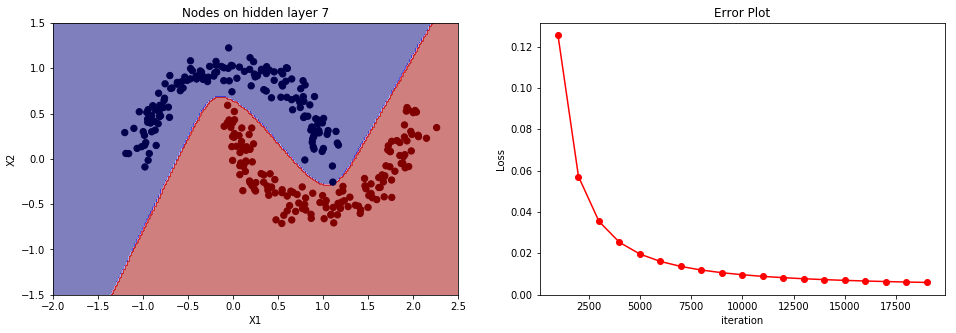

In [34]:
n_hidden = 7

epoch = 20000
alpha = 0.001
reg = 0.01
model, iterations, error = train_softmax(X, y, n_hidden, epoch, alpha, reg)


#plot
x1 = np.linspace(-2., 2.5, 200)
x2 = np.linspace(-1.5, 1.5, 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict_softmax(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=np.argmax(y, axis=1), cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nodes on hidden layer %d'%(n_hidden))
plt.xlim(-2.,2.5)
plt.ylim(-1.5,1.5)
 
plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()



#### Let's try with a different dataset

In [35]:
#iris data
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
iris_y = pd.get_dummies(iris_y).values


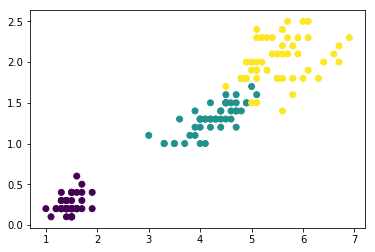

In [36]:
plt.scatter(iris_X[:,2],iris_X[:,3], c=np.argmax(iris_y, axis=1)) #, cmap=plt.cm.seismic)
plt.show()

In [37]:
train_X = iris_X[:,2:4]
n_hidden = 20

epoch = 20000
alpha = 0.01
reg = 0.00 
model, iterations, error = train_softmax(train_X, iris_y, n_hidden, epoch, alpha, reg)

Steps: 0, Error: 0.952738
Steps: 1000, Error: 0.159048
Steps: 2000, Error: 0.101047
Steps: 3000, Error: 0.0835173
Steps: 4000, Error: 0.0743481
Steps: 5000, Error: 0.0683895
Steps: 6000, Error: 0.0645585
Steps: 7000, Error: 0.0626337
Steps: 8000, Error: 0.0614334
Steps: 9000, Error: 0.0602444
Steps: 10000, Error: 0.0591761
Steps: 11000, Error: 0.058109
Steps: 12000, Error: 0.0568143
Steps: 13000, Error: 0.0551122
Steps: 14000, Error: 0.0530319
Steps: 15000, Error: 0.0509907
Steps: 16000, Error: 0.0492846
Steps: 17000, Error: 0.0478726
Steps: 18000, Error: 0.0466863
Steps: 19000, Error: 0.0456873


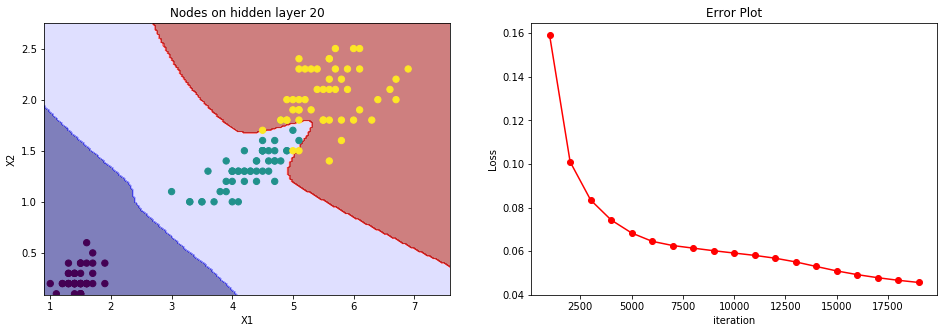

In [38]:
#plot
x1 = np.linspace(0.9*min(train_X[:,0]), 1.1*max(train_X[:,0]), 200)
x2 = np.linspace(0.9*min(train_X[:,1]), 1.1*max(train_X[:,1]), 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict_softmax(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=np.argmax(iris_y, axis=1)) #, cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nodes on hidden layer %d'%(n_hidden))
plt.xlim(0.9*min(train_X[:,0]), 1.1*max(train_X[:,0]))
plt.ylim(0.9*min(train_X[:,1]), 1.1*max(train_X[:,1]))
 
plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()

#### Using all features

In [39]:
train_X = iris_X
n_hidden = 30

epoch = 30000
alpha = 0.0005
reg = 0.00
model, iterations, error = train_softmax(train_X, iris_y, n_hidden, epoch, alpha, reg, decay=False)

Steps: 0, Error: 2.67171
Steps: 1000, Error: 0.101102
Steps: 2000, Error: 0.0718856
Steps: 3000, Error: 0.0622935
Steps: 4000, Error: 0.0573743
Steps: 5000, Error: 0.054284
Steps: 6000, Error: 0.0521032
Steps: 7000, Error: 0.0504449
Steps: 8000, Error: 0.0491182
Steps: 9000, Error: 0.0480177
Steps: 10000, Error: 0.0470803
Steps: 11000, Error: 0.0462661
Steps: 12000, Error: 0.0455482
Steps: 13000, Error: 0.0449077
Steps: 14000, Error: 0.0443307
Steps: 15000, Error: 0.0438065
Steps: 16000, Error: 0.0433263
Steps: 17000, Error: 0.0428835
Steps: 18000, Error: 0.0424728
Steps: 19000, Error: 0.0420897
Steps: 20000, Error: 0.0417308
Steps: 21000, Error: 0.0413931
Steps: 22000, Error: 0.0410742
Steps: 23000, Error: 0.0407718
Steps: 24000, Error: 0.0404842
Steps: 25000, Error: 0.0402098
Steps: 26000, Error: 0.0399472
Steps: 27000, Error: 0.0396953
Steps: 28000, Error: 0.0394529
Steps: 29000, Error: 0.0392191


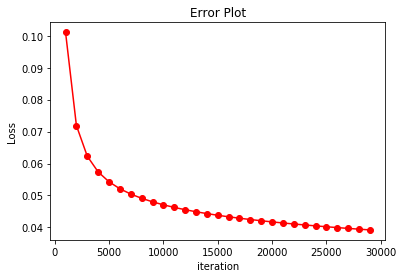

In [40]:
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()

Let's now add one more hidden layer. 

## Neural net with 2 hidden layers

#### Forward propogation:<br>
$z^{2} = (W^{1})^{T}X + b^{1}$ <br>
$a^{2} = sigmod(z^{2})$    

$z^{3} = (W^{2})^{T}a^{2} + b^{2}$ <br>
$a^{3} = sigmod(z^{3})$ <br>

$z^{4} = (W^{3})^{T}a^{3} + b^{3}$ <br>
$a^{4} = softmax(z^{4})$ <br>

#### Cost Function: (m examples and k outputs)<br>
$J = - \frac{1}{m} \sum_{m} \sum_{i} y_{i}.log(y^{'}_{i}) $ <br>
$y^{'}=a^{4}$ is the predicted output i.e. softmax($z^{4}$) in this case. <br>

For output layer:
$\delta^{4} = (a^{4}_{i}-y_{i})$

#### Back propagation:<br>
$\frac{\partial J}{\partial z^{4}} = \delta ^{4} = (a^{4}-y)$    size [m, k]

$\delta ^{3} = (W^{3})^{T}\delta ^{4} \odot f'(z^{3}) $  ---------size [m,  n_hidden2] <br>
$\odot $represents item wise product

$\delta ^{2} = (W^{2})^{T}\delta ^{3} \odot f'(z^{2}) $  ---------size [m,  n_hidden1] <br>

$\frac{\partial J}{\partial W^{3}} = (a^{3})^{T} \delta^{4} $  matrix of size [n_hidden2, k]<br>
$\frac{\partial J}{\partial b^{3}} = \sum^{m} \delta^{4} $ vector of size [1,k]<br> 
$\frac{\partial J}{\partial W^{2}} = (a^{2})^{T} \delta^{3} $  matrix of size [n_hidden1, n_hidden2]<br>
$\frac{\partial J}{\partial b^{2}} = \sum^{m} \delta^{3} $ vector of size [1,n_hidden2]<br> 
$\frac{\partial J}{\partial W^{1}} = X^{T} \delta^{2} $ matrix of size [n_input, n_hidden1]<br>
$\frac{\partial J}{\partial b^{1}} = \sum^{m}\delta^{2} $ vector of size [1, n_hidden1]<br>

#### Updates:<br>
$W^{l} = W^{l} - \alpha \frac{\partial J}{\partial W^{l}}$
$b^{l} = b^{l} - \alpha \frac{\partial J}{\partial b^{l}}$


In [41]:
def sigmoid(t):
    return 1./(1.+np.exp(-t))

def softmax(t):
    t = np.exp(t)
    return t/(np.sum(t, axis=1).reshape((len(t),1)))
    

def predict_softmax2(model, X_):
    #W, b = model['W'], model['b']#, model['W2'], model['b2']
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    z2 = X_.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = sigmoid(z3)
    z4 = a3.dot(W3)+b3
    a4 = softmax(z4)
    return np.argmax(a4, axis=1)
    
def train_softmax2(data, target, h, epoch, alpha_, reg, decay=0.,printInfo=False):
    n_input = data.shape[1]
    n_output = target.shape[1]
    #nodes = [data.shape[1]] + h + [target.shape[1]]
    W1 = np.random.randn(n_input,h[0]) 
    b1 = np.random.randn(1,h[0])
    W2 = np.random.randn(h[0], h[1])
    b2 = np.random.randn(1,h[1])
    W3 = np.random.randn(h[1],n_output)
    b3 = np.random.randn(1,n_output)
    iterations = []
    error = []
    
    for i in range(epoch):
        
        alpha = alpha_*np.exp(-np.array(i)*decay)

        #forward prop
        z2 = data.dot(W1)+b1
        a2 = sigmoid(z2)
        #print(a2.shape)
        z3 = a2.dot(W2)+b2
        a3 = sigmoid(z3)
        
        z4 = a3.dot(W3)+b3
        a4 = softmax(z4)
        
        #print(a3.shape)
        
            
        delta4 = (a4-target)   #(y'-y) 
        #print(delta3.shape)
        dW3 = (a3.T).dot(delta4)
        db3 = np.sum(delta4, axis=0).reshape((1,delta4.shape[1]))
        #print(dW2.shape)
        delta3 = (delta4).dot(W3.T)*a3*(1.-a3)
        dW2 = (a2.T).dot(delta3)
        db2 = np.sum(delta3, axis=0).reshape((1,delta3.shape[1]))
        #print(db2.shape)
        delta2 = (delta3).dot(W2.T)*a2*(1.-a2)
        dW1 = (data.T).dot(delta2)
        db1 = np.sum(delta2, axis=0).reshape((1,delta2.shape[1]))
        #print(db1.shape)
        
        
        
        #regularization
        dW3 += reg*W3
        dW2 += reg*W2
        dW1 += reg*W1
        #dW += rw
        
        #Gradient descent, updating W and b
        W1-= alpha*dW1
        W2-= alpha*dW2
        W3-= alpha*dW3
        b1-= alpha*db1
        b2-= alpha*db2
        b3-= alpha*db3
        #W -=alpha*dW
        #b -=alpha*db
        #print(b2.shape)
        #print(b1.shape)
        parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2 , 'W3':W3, 'b3':b3}
        #parameters = {'W':W, 'b':b}
        
        if i% 1000==0:
            iterations.append(i)
            
            loss = -1.*target*np.log(a4)
            loss = np.sum(loss, axis=1)
            loss =  np.average(loss)
            error.append(loss)
            if printInfo:
                print('Steps: %d, Error: %g'%(i,loss))
    
    return parameters , iterations, error
        
        



In [46]:
train_X = iris_X
n_hidden = [4,4]

epoch = 20000
alpha = 0.0001
reg = 0.01
model, iterations, error = train_softmax2(train_X, iris_y, n_hidden, epoch, alpha, reg, printInfo=True)

Steps: 0, Error: 1.18851
Steps: 1000, Error: 0.897067
Steps: 2000, Error: 0.677588
Steps: 3000, Error: 0.536972
Steps: 4000, Error: 0.427235
Steps: 5000, Error: 0.321005
Steps: 6000, Error: 0.237326
Steps: 7000, Error: 0.183506
Steps: 8000, Error: 0.150185
Steps: 9000, Error: 0.128717
Steps: 10000, Error: 0.114105
Steps: 11000, Error: 0.103662
Steps: 12000, Error: 0.0959001
Steps: 13000, Error: 0.0899467
Steps: 14000, Error: 0.0852615
Steps: 15000, Error: 0.0814922
Steps: 16000, Error: 0.0784006
Steps: 17000, Error: 0.0758206
Steps: 18000, Error: 0.0736342
Steps: 19000, Error: 0.071756


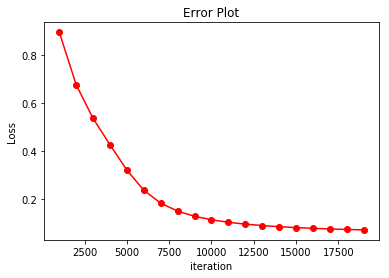

In [47]:
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()


#### Visulaizing with  2 features

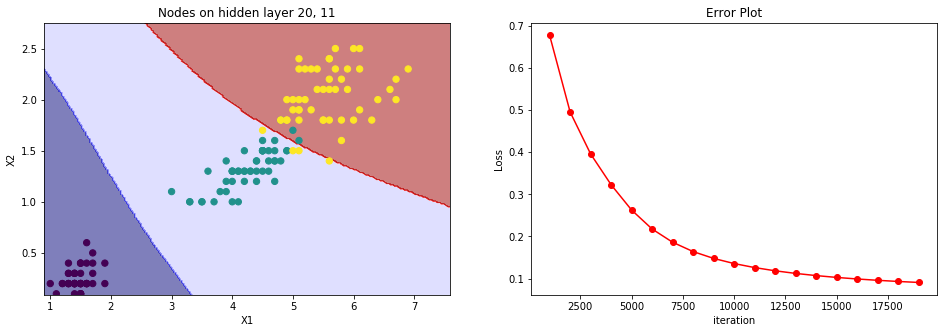

In [49]:
train_X = iris_X[:,2:4]
n_hidden = [20,11]

epoch = 20000
alpha = 0.0001
reg = 0.01 
model, iterations, error = train_softmax2(train_X, iris_y, n_hidden, epoch, alpha, reg)

#plot
x1 = np.linspace(0.9*min(train_X[:,0]), 1.1*max(train_X[:,0]), 200)
x2 = np.linspace(0.9*min(train_X[:,1]), 1.1*max(train_X[:,1]), 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict_softmax2(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=np.argmax(iris_y, axis=1)) #, cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nodes on hidden layer %d, %d'%(n_hidden[0],n_hidden[1]))
plt.xlim(0.9*min(train_X[:,0]), 1.1*max(train_X[:,0]))
plt.ylim(0.9*min(train_X[:,1]), 1.1*max(train_X[:,1]))
 
plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()

### Let's now try with make_moons dataset

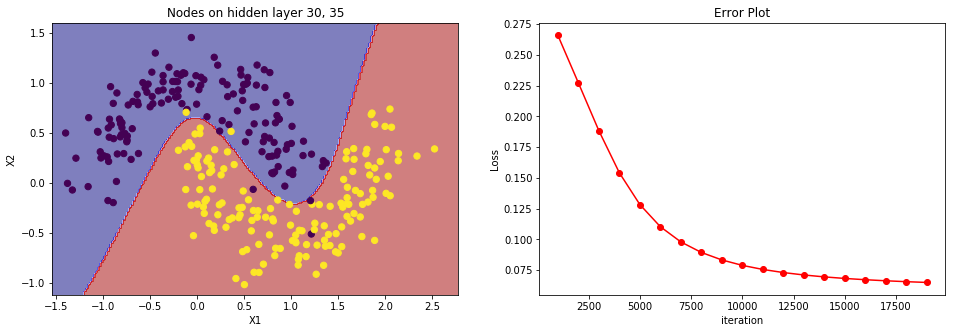

In [50]:
#moon data
np.random.seed(0)
X, y = datasets.make_moons(300, noise=0.20)
#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.seismic)
#plt.xlabel('X1')
#plt.ylabel('X2')
#plt.show()
y = pd.get_dummies(y).values
train_X = X
train_y = y


n_hidden = [30,35]

epoch = 20000
alpha = 0.0001
reg = 0.00 
model, iterations, error = train_softmax2(train_X, train_y, n_hidden, epoch, alpha, reg)

#plot
x1 = np.linspace(1.1*min(train_X[:,0]), 1.1*max(train_X[:,0]), 200)
x2 = np.linspace(1.1*min(train_X[:,1]), 1.1*max(train_X[:,1]), 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict_softmax2(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=np.argmax(train_y, axis=1)) #, cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nodes on hidden layer %d, %d'%(n_hidden[0],n_hidden[1]))
plt.xlim(1.1*min(train_X[:,0]), 1.1*max(train_X[:,0]))
plt.ylim(1.1*min(train_X[:,1]), 1.1*max(train_X[:,1]))
 
plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()